
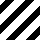
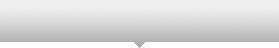
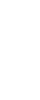
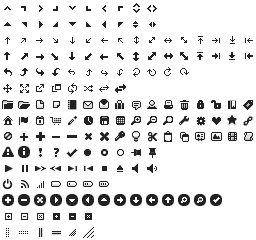
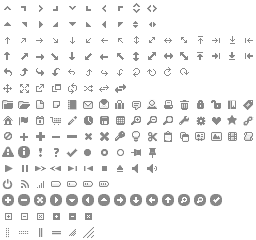
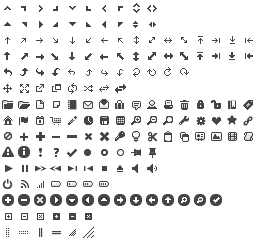
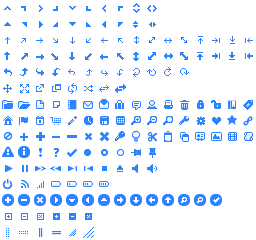
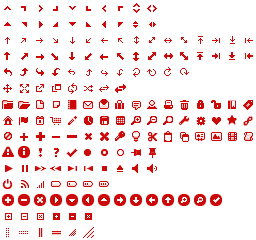
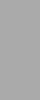
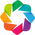
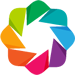
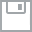
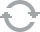
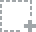
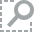
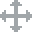
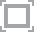
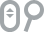

In [3]:
import numpy as np

from bokeh.plotting import output_notebook, figure, show, hplot
from bokeh.models import ColumnDataSource, Callback, Rect

output_notebook()

N = 20
img = np.empty((N,N), dtype=np.uint32)
view = img.view(dtype=np.uint8).reshape((N, N, 4))
for i in range(N):
    for j in range(N):
        view[i, j, 0] = int(i/N*255)
        view[i, j, 1] = 158
        view[i, j, 2] = int(j/N*255)
        view[i, j, 3] = 255
        
source = ColumnDataSource({'x':[], 'y':[], 'width':[], 'height':[]})

xrange_callback = Callback(args=dict(source=source), code="""
    var data = source.get('data');
    var start = cb_obj.get('frame').get('x_range').get('start');
    var end = cb_obj.get('frame').get('x_range').get('end');
    data['x'] = [start + (end - start) / 2];
    data['width'] = [end - start];
    source.trigger('change');
""")

yrange_callback = Callback(args=dict(source=source), code="""
    var data = source.get('data');
    var start = cb_obj.get('frame').get('y_range').get('start');
    var end = cb_obj.get('frame').get('y_range').get('end');
    data['y'] = [start + (end - start) / 2];
    data['height'] = [end - start];
    source.trigger('change');
""")

p1 = figure(title='Box Zoom Here', x_range=[0,10], y_range=[0,10], tools = ['box_zoom', 'reset'])
p1.image_rgba(image=[img], x=[0], y=[0], dw=[10], dh=[10], level='image')
p1.x_range.callback = xrange_callback
p1.y_range.callback = yrange_callback

p2 = figure(title='See Zoom Window Here', x_range=[0,10], y_range=[0,10], tools="")
p2.image_rgba(image=[img], x=[0], y=[0], dw=[10], dh=[10], level='image')
rect = Rect(x='x', y='y', width='width', height='height', fill_alpha=0.0, line_color='black')
p2.add_glyph(source, rect)

show(hplot(p1, p2))